## 1. Import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = "http://data.un.org/_Docs/SYB/CSV/SYB64_246_202110_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv"

df = pd.read_csv(data_url, encoding = "ISO-8859-1")

df.head(12)

,T03,Population growth and indicators of fertility and mortality,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
5,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
6,1,"Total, all countries or areas",2010,Life expectancy at birth for males (years),66.7,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
7,1,"Total, all countries or areas",2010,Life expectancy at birth for females (years),71.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
8,1,"Total, all countries or areas",2015,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
9,1,"Total, all countries or areas",2015,Total fertility rate (children per women),2.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


## 2. Select life expectancy data for countries and format it into a numpy array

In [6]:
# Select country data only
values = pd.DataFrame(df.iloc[625:,[2,3,4]])
values.columns = ['Year', 'Series', 'Values']

# Optional filter by year
#values = values[values['Year']=='2020']
# Select life expectancy data, 
# Make sure it is typed correctly
# Turn it into a numpy array
life_exp = values[values['Series']=='Life expectancy at birth for both sexes (years)']
life_exp = life_exp['Values'].astype(float).to_numpy()
N = life_exp.shape[0]
print(N)

603


## 3. Centrality: mean and median

The distribution is skewed to the left. This is reflected in the fact that the mean is significantly below the median.

Sample size: 603


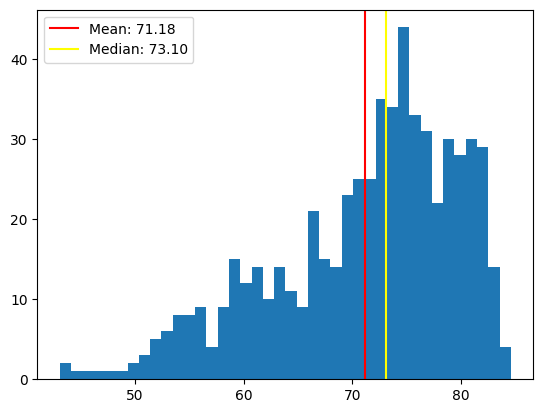

In [7]:
print("Sample size: {}".format(N))
mean = np.mean(life_exp)
median = np.median(life_exp)
counts, bins = np.histogram(life_exp,int(N/15))
plt.hist(bins[:-1], bins, weights=counts)
plt.axvline(x=mean, color='red', label='Mean: {:.2f}'.format(mean))
plt.axvline(x=median, color='yellow', label='Median: {:.2f}'.format(median))
plt.legend()
plt.show()

## 4. Dispersion: range, IQR and standard deviation

Range = 41.50
IQR = 11.65
Standard deviation = 8.55


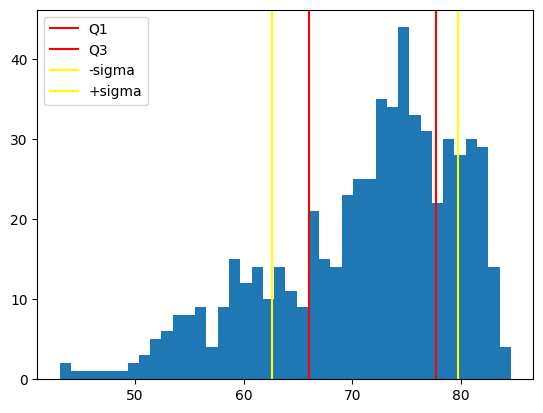

In [8]:
min_le, max_le = np.min(life_exp), np.max(life_exp)
stdev = np.std(life_exp)
Q1 = np.percentile(life_exp,25) 
Q3 = np.percentile(life_exp,75)

print('Range = {:.2f}'.format(max_le-min_le))
print('IQR = {:.2f}'.format(Q3-Q1))
print('Standard deviation = {:.2f}'.format(stdev))

counts, bins = np.histogram(life_exp,int(N/15))
plt.hist(bins[:-1], bins, weights=counts)
plt.axvline(x=Q1, color='red', label='Q1')
plt.axvline(x=Q3, color='red', label='Q3')
plt.axvline(x=mean - stdev, color='yellow', label='-sigma')
plt.axvline(x=mean + stdev, color='yellow', label='+sigma')
plt.legend()
plt.show()


## 5. Sampling from a similar probability distribution

- The life expectancy data is real-valued, so one should definitely choose a distribution on the real line.
- Life expectancy cannot be negative, so a distribution supported by the positive real line might be a good option.
- There is no a priori maximum possible value, so a semi-infinite support might be a better option than a compact support (interval).
- On the other hand, none of the distributions on $[0,\infty)$ which we have discussed have a negative skew.
- An example of distribution which we have seen in the lectures and which can has a negative skew is the Beta distribution, which we can rescale to cover the life expectancy range.

Other options are possible! The most important feature that needed to be identified were: the positive real support and the skew.

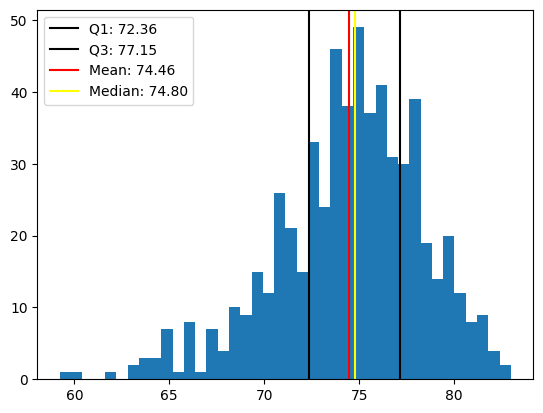

In [13]:
from scipy.stats import beta
a, b = 15, 5
r = beta.rvs(a,b,size = N)
r = min_le + r * (max_le - min_le)
Q1 = np.percentile(r,25) 
Q2 = np.percentile(r,50)
Q3 = np.percentile(r,75)
mean = np.mean(r)
counts, bins = np.histogram(r,int(N/15))
plt.hist(bins[:-1], bins, weights=counts)
plt.axvline(x=Q1, color='black', label='Q1: {:.2f}'.format(Q1))
plt.axvline(x=Q3, color='black', label='Q3: {:.2f}'.format(Q3))
plt.axvline(x=mean, color='red', label='Mean: {:.2f}'.format(mean))
plt.axvline(x=Q2, color='yellow', label='Median: {:.2f}'.format(Q2))
plt.legend()
plt.show()